In [ ]:
from astropy.table import Table
from scipy.stats import zscore
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sys
import os
from scipy.stats import gaussian_kde
import numpy as np
import json
import urllib
import re

In [ ]:
df_h = Table.read('table-4LAC-DR3-h.fits')
df_h = df_h.to_pandas()
df_h = df_h[df_h['Flags']==0]

df_l = Table.read('table-4LAC-DR3-l.fits')
df_l = df_l.to_pandas()
df_l = df_l[df_l['Flags']==0]

In [ ]:
classification_df = pd.concat([df_h, df_l], ignore_index=True)
classification_df['CLASS'] = classification_df['CLASS'].str.decode('utf-8')
classification_df['CLASS'] = classification_df['CLASS'].str.upper()
classification_df = classification_df[classification_df['CLASS'].isin(['BLL', 'FSRQ', 'BCU'])]

In [ ]:
BLL_df = classification_df[classification_df['CLASS'].isin(['BLL'])]
FSRQ_df = classification_df[classification_df['CLASS'].isin(['FSRQ'])]
BCU_df = classification_df[classification_df['CLASS'].isin(['BCU'])]

In [ ]:
classification_df

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
0,b'4FGL J0001.2+4741',1,0.312600,47.685902,114.250198,-14.338059,4.692600,1.259796e-10,2.877197e-11,1.499454e-12,...,NaN,NaN,-inf,-inf,1.000000e+14,3.716456e-13,25.313953,0.675882,0.312850,65.575203
1,b'4FGL J0001.2-0747',1,0.315100,-7.797100,89.032722,-67.305008,23.782486,7.471219e-10,5.041939e-11,8.339171e-12,...,796.297852,766.797424,8.686245e-07,7.492923e-08,9.120108e+13,1.936770e-12,46.780693,0.406565,0.111870,86.975197
2,b'4FGL J0001.4-0010',3,0.371700,-0.169900,96.891991,-60.491329,4.900018,1.082246e-10,2.914440e-11,1.231385e-12,...,15475.512695,18471.714844,1.494930e-07,8.294155e-08,3.609939e+12,2.473256e-13,9.272764,0.000000,10.000000,30.056200
3,b'4FGL J0001.5+2113',1,0.381500,21.218300,107.649353,-40.167652,54.653084,1.347354e-09,6.172809e-11,2.555889e-11,...,65.680008,18.915735,8.844835e-06,8.229393e-07,1.584893e+14,1.152471e-12,1910.935791,0.996138,0.213478,-inf
4,b'4FGL J0001.8-2153',3,0.464700,-21.886499,55.184696,-77.572540,4.578068,9.047530e-11,2.442527e-11,1.061114e-12,...,6281.065430,2626.445068,1.545364e-07,5.278574e-08,1.659588e+13,9.716011e-13,24.557972,0.902851,0.380107,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,b'4FGL J2237.4+5124',3,339.373199,51.415001,102.684616,-6.113458,5.600540,1.486060e-10,4.146037e-11,1.650939e-12,...,4748.909180,5513.632812,1.636098e-07,4.349667e-08,3.311315e+13,1.006315e-12,14.602383,0.328630,0.612450,97.652802
3170,b'4FGL J2251.2+5550',2,342.803894,55.843102,106.574341,-3.163003,5.120801,2.168504e-10,6.168643e-11,1.282844e-12,...,3268.443604,1497.775391,2.823202e-07,6.913375e-08,0.000000e+00,0.000000e+00,34.235767,1.071415,0.315385,-inf
3171,b'4FGL J2329.7+6101',1,352.434296,61.023899,113.198418,-0.294415,15.066041,6.746162e-10,7.522848e-11,7.496495e-12,...,3268.194580,9568.627930,6.829078e-07,7.403928e-08,0.000000e+00,0.000000e+00,22.359163,0.337927,0.140322,143.735001
3172,b'4FGL J2347.0+5141',1,356.765900,51.696602,112.886703,-9.915193,70.645012,2.882701e-09,8.283773e-11,3.227763e-11,...,56117.906250,39034.074219,4.268890e-06,3.307706e-07,1.566751e+16,1.279994e-11,58.688427,0.201833,0.052628,805.708008


In [ ]:
import numpy as np
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ra = coord.Angle(classification_df['GLON']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(classification_df['GLAT']*u.degree)

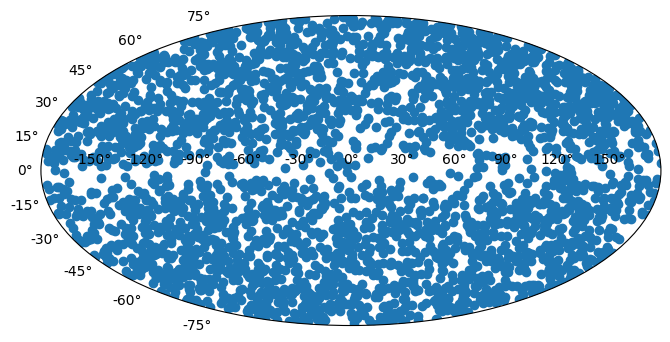

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian[:], dec.radian[:])

In [ ]:
BLL_df['DEJ2000']

1       -7.797100
2       -0.169900
5      -67.474602
11     -11.825100
12       8.675700
          ...    
3153    49.422100
3157    52.312599
3161    36.929699
3165    41.940899
3172    51.696602
Name: DEJ2000, Length: 1335, dtype: float32

In [ ]:
ra_BLL = coord.Angle(BLL_df['GLON']*u.degree)
ra_BLL = ra_BLL.wrap_at(180*u.degree)
dec_BLL = coord.Angle(BLL_df['GLAT']*u.degree)

ra_FSRQ = coord.Angle(FSRQ_df['GLON']*u.degree)
ra_FSRQ = ra_FSRQ.wrap_at(180*u.degree)
dec_FSRQ = coord.Angle(FSRQ_df['GLAT']*u.degree)

ra_BCU = coord.Angle(BCU_df['GLON']*u.degree)
ra_BCU = ra_BCU.wrap_at(180*u.degree)
dec_BCU = coord.Angle(BCU_df['GLAT']*u.degree)

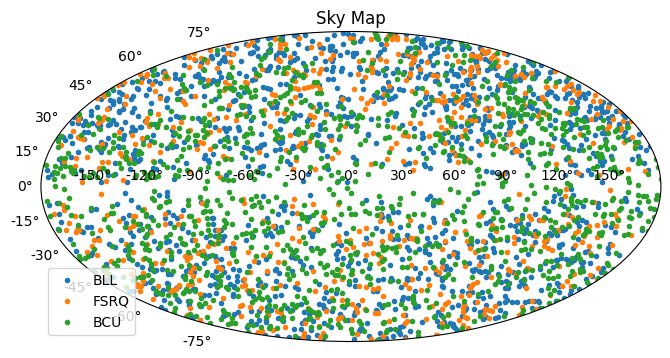

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_BLL.radian, dec_BLL.radian, marker=".", label="BLL")
ax.scatter(ra_FSRQ.radian, dec_FSRQ.radian, marker=".", label = "FSRQ")
ax.scatter(ra_BCU.radian, dec_BCU.radian, marker=".", label = "BCU")
# plt.grid("False")
plt.title("Sky Map")
plt.legend()

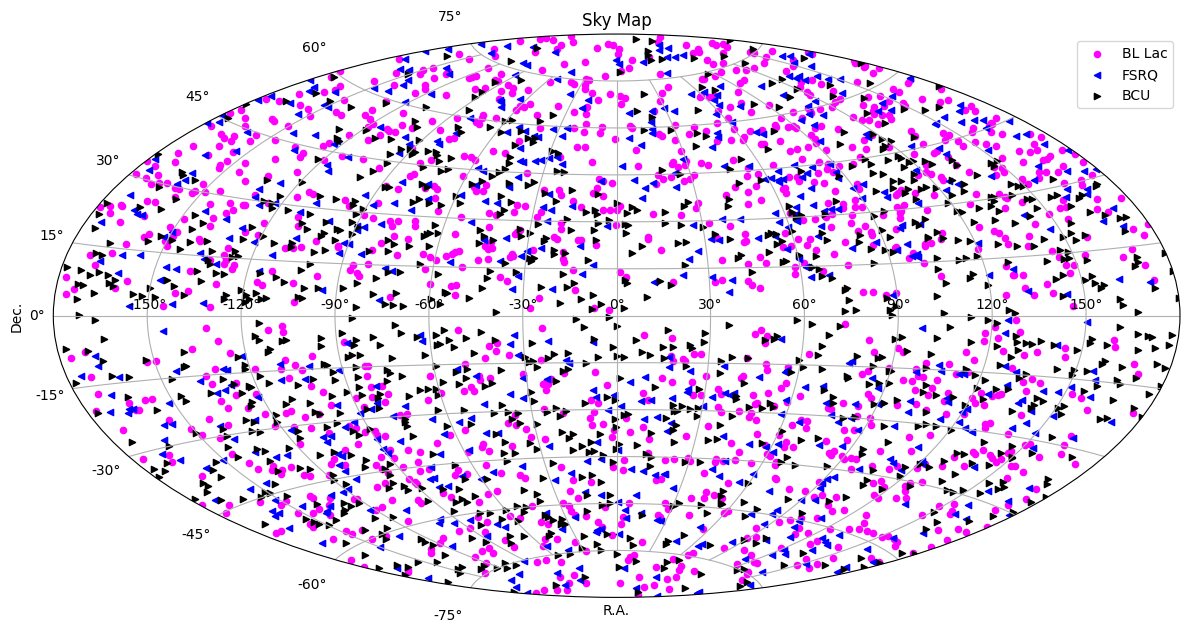

In [ ]:
plt.figure(figsize=(12,6.35))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.scatter(ra_BLL.radian, dec_BLL.radian, marker="o", label="BL Lac", s = 20, c = 'magenta')
plt.scatter(ra_FSRQ.radian, dec_FSRQ.radian, marker="<", label = "FSRQ", s = 20, c = 'blue')
plt.scatter(ra_BCU.radian, dec_BCU.radian, marker=">", label = "BCU", s = 20, c = 'black')
plt.title("Sky Map")
plt.xlabel('R.A.')
plt.ylabel('Dec.')
plt.(fill_color='black')
plt.legend()
plt.tight_layout()
# plt.savefig("download.eps")
plt.show()

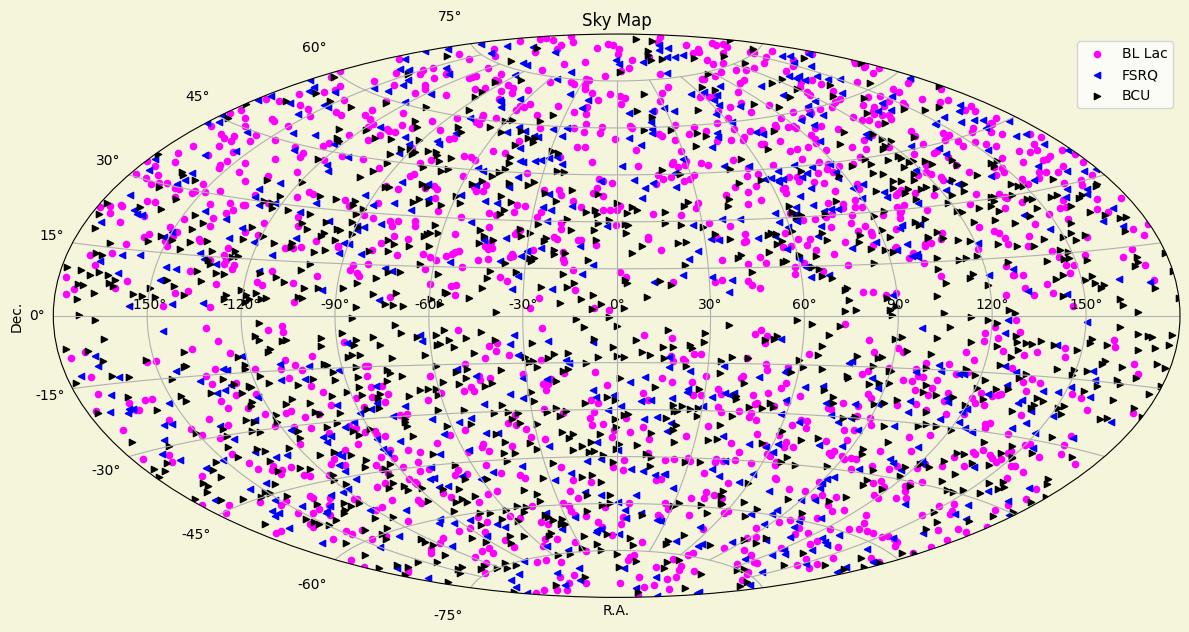

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a grey background
fig = plt.figure(figsize=(12, 6.35), facecolor='beige')

# Create an Aitoff projection subplot with a black background
ax = fig.add_subplot(111, projection="aitoff", facecolor='beige')

# Scatter plots with markers and colors
ax.grid(True)
ax.scatter(ra_BLL.radian, dec_BLL.radian, marker="o", label="BL Lac", s=20, c='magenta')
ax.scatter(ra_FSRQ.radian, dec_FSRQ.radian, marker="<", label="FSRQ", s=20, c='blue')
ax.scatter(ra_BCU.radian, dec_BCU.radian, marker=">", label="BCU", s=20, c='black')

# Set the title, labels, and legend
ax.set_title("Sky Map")
ax.set_xlabel('R.A.')
ax.set_ylabel('Dec.')
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
